### Load packages and generate data points

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

import torch
import torch.nn as nn

from vector_quantize_pytorch import VectorQuantize

# data points
data = nn.Parameter(1.5 * torch.randn(50, 2) + 2)
data.requires_grad = False

def convert_input(x):
    if not isinstance(x, np.ndarray):
        x = x.cpu().detach().numpy()
    assert x.ndim == 2, f"Data should be 2D array, but got {x.ndim}D array!"
    assert x.shape[1] == 2, f"Data should have 2 columns, but got {x.shape[1]} columns!"
    return x

def save_fig(model, data, name, color="red"):
    optimizer = torch.optim.AdamW(list(model.parameters()) + [data], lr=5e-3)
    plt.subplots(1, 6, figsize=(15, 2.5), dpi=400)
    for i in trange(1000):
        optimizer.zero_grad()
        _, _, loss = model(data.unsqueeze(0))
        loss.backward()
        optimizer.step()

        if i % 150 == 0 and i != 0:
            with torch.no_grad():
                plt.subplot(1, 6, int(i/150))

                data_draw = convert_input(data)
                code_draw = convert_input(model.codebook)
                
                plt.scatter(data_draw[:, 0], data_draw[:, 1], label="Data", s=5, c="gray", marker="o")
                plt.scatter(code_draw[:, 0], code_draw[:, 1], label="Code", s=18, c=color, marker="*")
                plt.xlim((-2, 5))
                plt.ylim((-2, 5))

                if i == 900:
                    plt.legend(loc="upper right")
                plt.grid(color="gray", alpha=0.8, ls="-.", lw=0.5)
                plt.title(f"Iter. {i}")
    plt.tight_layout()
    plt.title(name)

### Vallina VQ: Quantization with nearest neighbor search

100%|██████████| 1000/1000 [00:01<00:00, 873.51it/s]


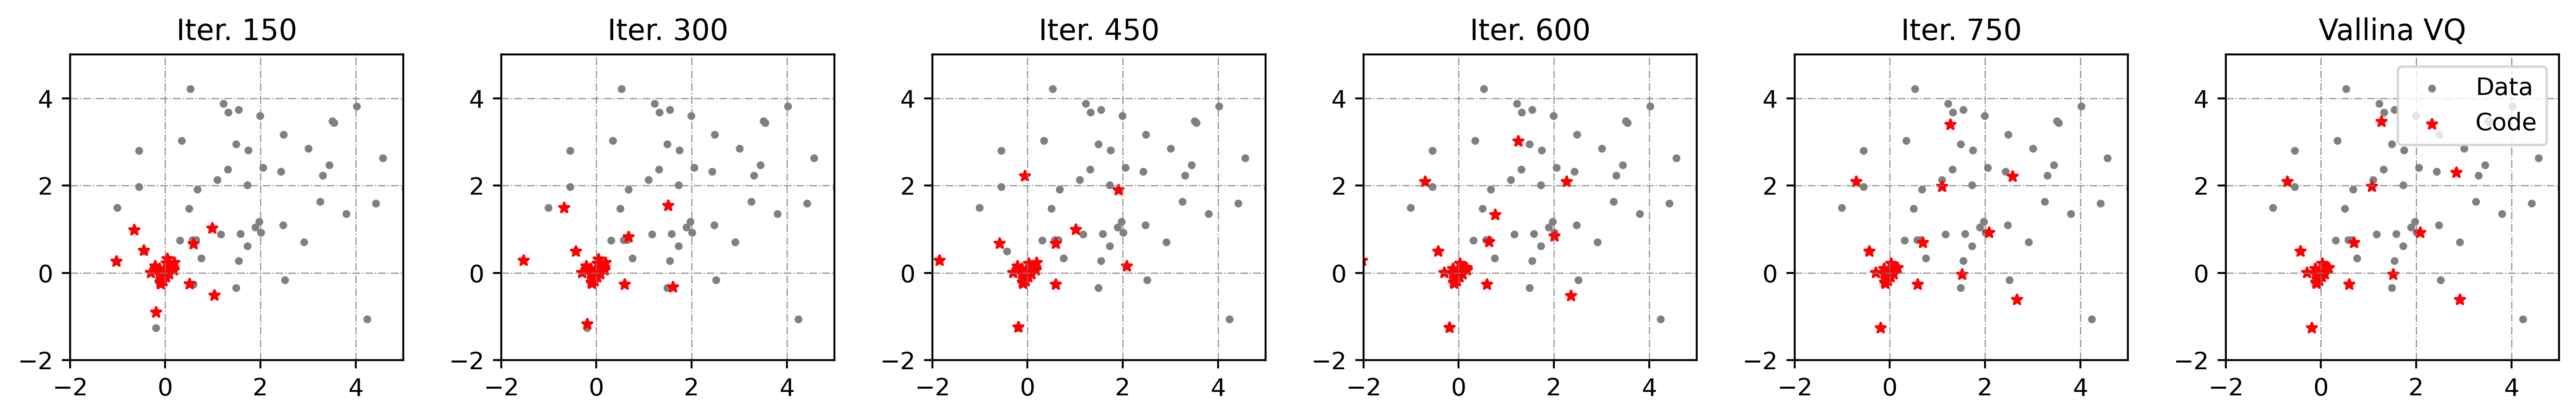

In [13]:
model = VectorQuantize(
    dim=2, codebook_size=25, decay=0.8, commitment_weight=1., 
    learnable_codebook=True, optimal_transport=False, ema_update=False
)
save_fig(model, data, "Vallina VQ", color="red")

### OptVQ: Quantization with optimal transport

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 650.30it/s]


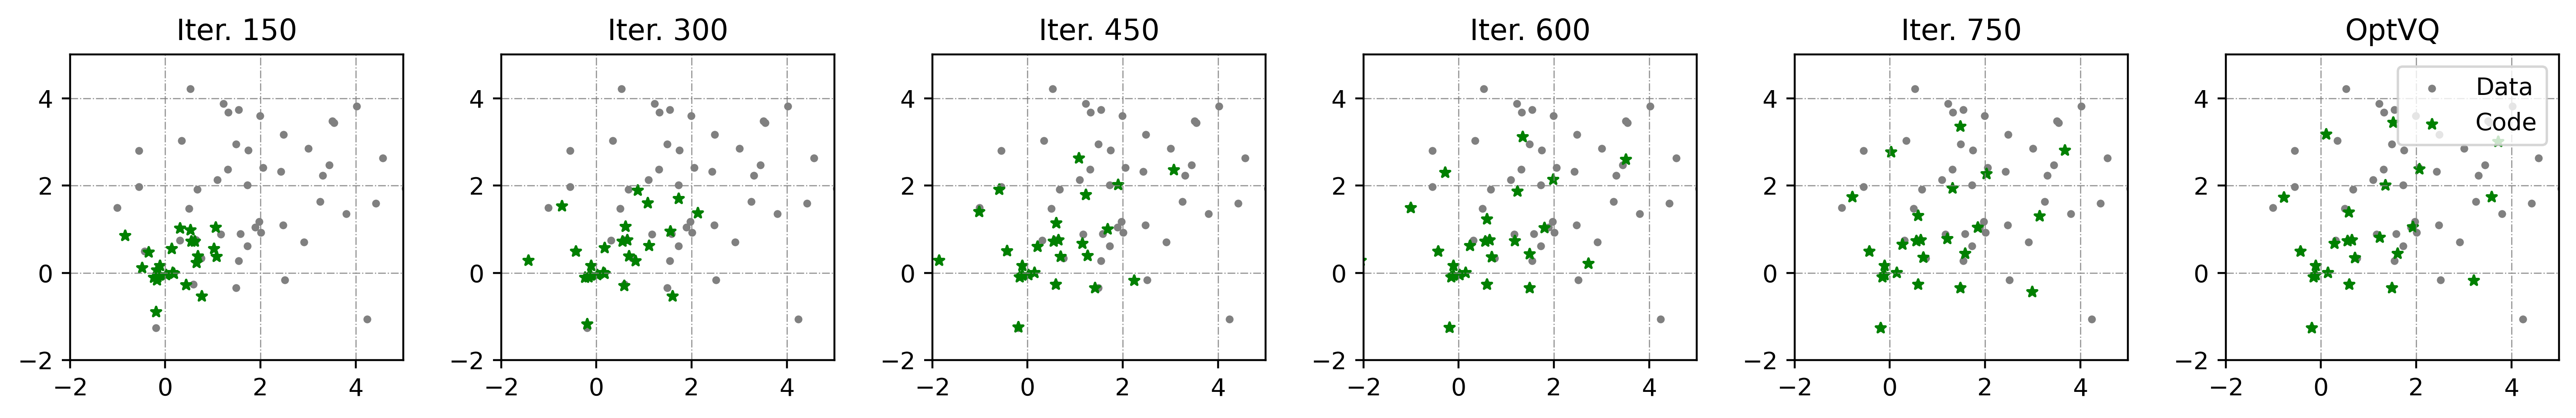

In [14]:
model = VectorQuantize(
    dim=2, codebook_size=25, decay=0.8, commitment_weight=1., 
    learnable_codebook=True, optimal_transport=True, ema_update=False
)
save_fig(model, data, "OptVQ", color="green")